In [3]:
import pandas as pd
df = pd.read_csv("PIE_data.csv", sep=";", header=0, index_col=0)
df.head()

,F_SESSION,F_START_FRAME,F_END_FRAME,F_DURATION,FIRST_WORD_INDEX,SECOND_WORD_INDEX,THIRD_WORD_INDEX
0,3152409,742,789,00:00:24.000,3.0,10.0,285.0
1,3152409,790,855,00:00:33.000,3.0,76.0,281.0
2,3152409,856,965,00:00:55.000,3.0,10.0,8.0
3,3152409,966,967,00:00:01.000,3.0,10.0,155.0
4,3152409,968,1001,00:00:17.000,3.0,76.0,146.0


In [ ]:
df = df.sort_values(by=['F_SESSION', 'F_START_FRAME'], ascending=[True, True])
df.head()

,F_SESSION,F_START_FRAME,F_END_FRAME,F_DURATION,FIRST_WORD_INDEX,SECOND_WORD_INDEX,THIRD_WORD_INDEX
877339,3130311,332,375,00:00:22.000,3.0,10.0,285.0
877340,3130311,376,441,00:00:33.000,3.0,76.0,281.0
877341,3130311,442,741,00:02:30.000,3.0,10.0,8.0
877342,3130311,742,760,00:00:09.500,3.0,28.0,40.0
877343,3130311,761,764,00:00:02.000,3.0,10.0,8.0


In [14]:
first = df['FIRST_WORD_INDEX']
second = df['SECOND_WORD_INDEX']
third = df['THIRD_WORD_INDEX']

print("Number of unique indexes:")
print("First word: ", len(df['FIRST_WORD_INDEX'].unique()))
print("Second word: ", len(df['SECOND_WORD_INDEX'].unique()))
print("Third word: ", len(df['THIRD_WORD_INDEX'].unique()))
print("Number of unique triplets: ", len(set(zip(first, second, third))))

Number of unique indexes:
First word:  12
Second word:  976
Third word:  1204
Number of unique triplets:  35044


In [15]:
len(df['F_SESSION'].unique())

1838

In [24]:
# Group by the 'Flight' column and count the number of occurrences
flight_counts = df.groupby('F_SESSION').size().reset_index(name='count')
flight_counts = flight_counts.sort_values(by='count', ascending=False)
print(flight_counts)

      F_SESSION  count
141     3135532   6700
1172    3177926   6021
1385    3185031   5942
860     3168154   5765
1792    3201520   5587
...         ...    ...
1289    3180447      3
1042    3173880      2
942     3170845      1
208     3137700      1
157     3136063      1

[1838 rows x 2 columns]


In [25]:
df[df['F_SESSION'] == 3136063]

,F_SESSION,F_START_FRAME,F_END_FRAME,F_DURATION,FIRST_WORD_INDEX,SECOND_WORD_INDEX,THIRD_WORD_INDEX
712327,3136063,163,167,00:00:02.500,3.0,10.0,285.0


In [28]:
flight_counts['count'].describe()

count    1838.000000
mean     1342.825898
std       732.449645
min         1.000000
25%       866.250000
50%      1188.000000
75%      1614.000000
max      6700.000000
Name: count, dtype: float64

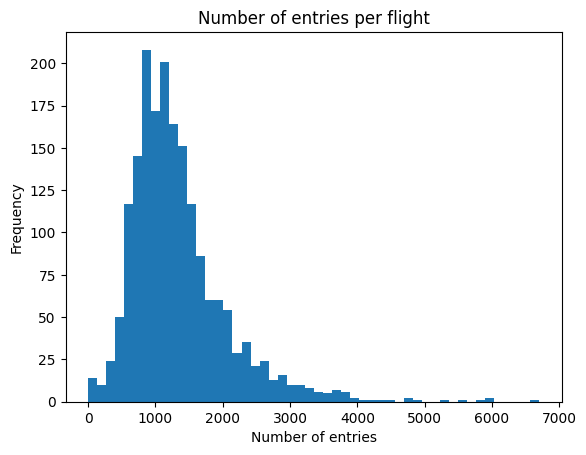

In [29]:
import matplotlib.pyplot as plt
plt.hist(flight_counts['count'], bins=50)
plt.title('Number of entries per flight')
plt.xlabel('Number of entries')
plt.ylabel('Frequency')
plt.show()

In [36]:
result_df = df.groupby(by=['FIRST_WORD_INDEX', 'SECOND_WORD_INDEX', 'THIRD_WORD_INDEX'])['F_SESSION'].nunique().reset_index(name='number_flights')
result_df.sort_values(by='number_flights', ascending=False)

,FIRST_WORD_INDEX,SECOND_WORD_INDEX,THIRD_WORD_INDEX,number_flights
31282,3.0,10.0,285.0,1833
31279,3.0,10.0,8.0,1832
31296,3.0,76.0,281.0,1829
31748,5.0,18.0,9.0,1813
33413,8.0,138.0,54.0,1804
...,...,...,...,...
34986,9.0,141.0,728.0,1
34985,9.0,141.0,660.0,1
34984,9.0,141.0,446.0,1
34983,9.0,141.0,363.0,1


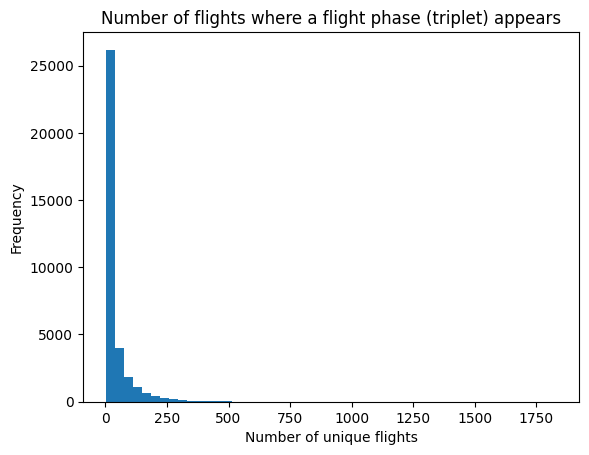

In [37]:
plt.hist(result_df['number_flights'], bins=50)
plt.title('Number of flights where a flight phase (triplet) appears')
plt.xlabel('Number of unique flights')
plt.ylabel('Frequency')
plt.show()

In [38]:
p = len(result_df[result_df['number_flights'] == 1])/len(result_df['number_flights'])
print(f"{p * 100:.2f}%")

17.87%


In [43]:
p = len(result_df[result_df['number_flights'] <= 4])/len(result_df['number_flights'])
print(f"{p * 100:.2f}%")

37.43%


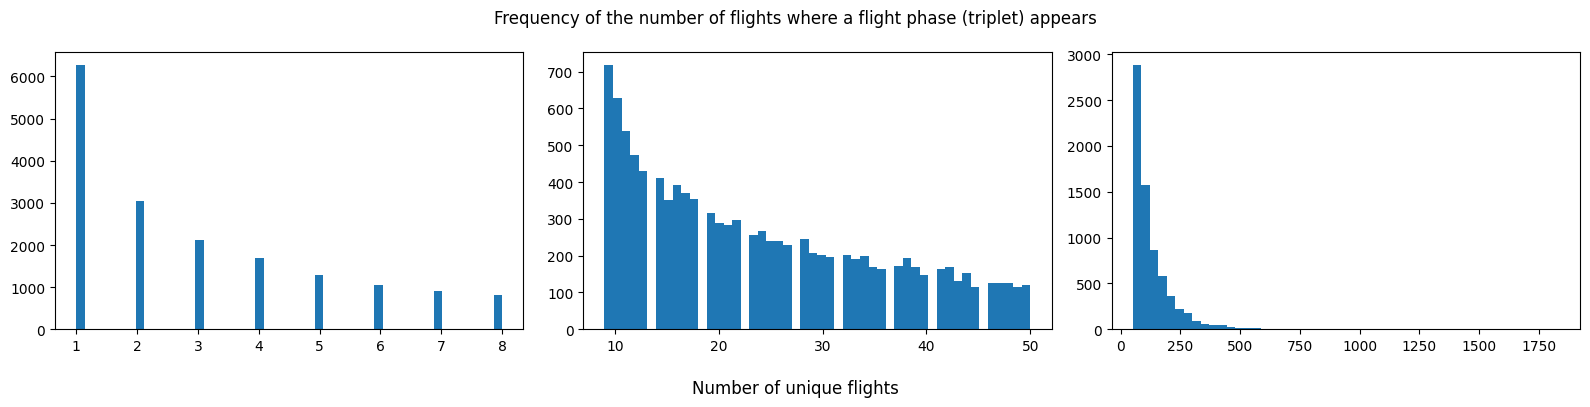

In [56]:
# Create subplots: 1 row, 3 columns
fig, axs = plt.subplots(1, 3, figsize=(16, 4))

# Plot each graph
axs[0].hist(result_df[result_df['number_flights'] <= 8]['number_flights'], bins=50)

interval = (result_df['number_flights'] <= 50) & (result_df['number_flights'] > 8)
axs[1].hist(result_df[interval]['number_flights'], bins=50)

axs[2].hist(result_df[result_df['number_flights'] > 50]['number_flights'], bins=50)

# Adjust layout
fig.suptitle('Frequency of the number of flights where a flight phase (triplet) appears')
fig.supxlabel('Number of unique flights')
plt.tight_layout()
plt.show()